In [1]:
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
data = pd.read_csv(r"C:\Users\faeze\Desktop\train.csv", encoding='iso-8859-1')

In [3]:
X = data.SentimentText
y = data.Sentiment

In [4]:
labels=[]
for i in y:
    labels.append(i)

In [5]:
texts = []
for j in X:
    texts.append(j)

In [6]:
max_words = 10000
maxlen = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [7]:
X = preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)

In [8]:
np.random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=100)

In [9]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [10]:
labels = np.asarray(labels)

In [11]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))

#model.add(LSTM(32, return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(32, return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = 'rmsprop',loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))

Train on 78991 samples, validate on 1000 samples
Epoch 1/5
78991/78991 [==============================] - 90s 1ms/step - loss: 0.6855 - acc: 0.5639 - val_loss: 0.6825 - val_acc: 0.5730
Epoch 2/5
78991/78991 [==============================] - 115s 1ms/step - loss: 0.6812 - acc: 0.5649 - val_loss: 0.6838 - val_acc: 0.5740
Epoch 3/5
78991/78991 [==============================] - 108s 1ms/step - loss: 0.7299 - acc: 0.5892 - val_loss: 0.6881 - val_acc: 0.5620
Epoch 4/5
78991/78991 [==============================] - 110s 1ms/step - loss: 0.6526 - acc: 0.6119 - val_loss: 0.7028 - val_acc: 0.5200
Epoch 5/5
78991/78991 [==============================] - 109s 1ms/step - loss: 0.6386 - acc: 0.6287 - val_loss: 0.7140 - val_acc: 0.5200


In [13]:
result = model.evaluate(X_test, y_test)
result

19998/19998 [==============================] - 17s 875us/step


[0.7179936846085389, 0.5230523052662894]

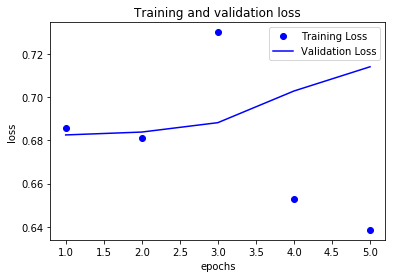

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

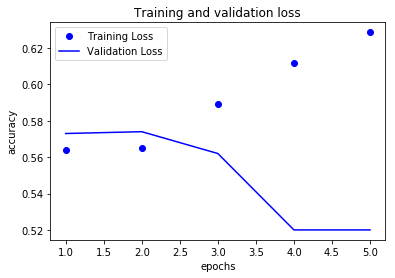

In [15]:
history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()